### **EDA II | 2026 - 1 | Grupo 4  | Práctica 4**
# **Algoritmos de Búsqueda. Parte 1**
### Gonzalez Barragan Abraham Elienai
## **Bibliotecas y Función para Crear Arreglo de Nodos**

In [ ]:
import random
import matplotlib.pyplot as plt

class Node:
    value = 0
    name = ""
    def __init__(self, intVal, strName):
        self.value = intVal
        self.name = strName
    def __str__(self):
        return self.name + " -> " + str(self.value)
    
def values_str(arr):
    n = len(arr)
    arr_values = [0] * n
    for i in range(n):
        cont = 0
        for j in range(n):
            if arr[j].lower() < arr[i].lower():
                cont += 1
            elif arr[j].lower() == arr[i].lower() and j < i:
                cont += 1
        arr_values[i] = cont
    return arr_values

def create_node_arr(arr, size, type, low_limit, up_limit):
    dogs = ["Labrador Retriever", "Pastor Alemán", "Golden Retriever", "Bulldog Inglés", "Beagle", "Poodle (Caniche)", "Rottweiler", "Yorkshire Terrier", "Dóberman", "Chihuahua", "Shih Tzu", "Boxer", "Husky Siberiano", "Dálmata", "Gran Danés", "Cocker Spaniel", "Bulldog Francés", "Border Collie", "San Bernardo", "Akita Inu"]
    dogs_values = values_str(dogs)
    i = 0
    while i < size:
        if type == 0: # Lista de Nodos con Valores Ordenados Ascendentemente
            element = Node((i + low_limit) % up_limit, "Nodo " + str(i + 1))
        if type == 1: # Lista de Nodos con Valores Ordenados Descendentemente
            element = Node(up_limit - i, "Nodo " + str(i + 1))
        if type == 2: # Lista de Nodos con Valores Aleatorios
            element = Node(random.randint(low_limit, up_limit), "Nodo " + str(i + 1))
        if type == 3: # Lista de Nodos con Palabras
            element = Node(dogs_values[i], dogs[i])
        arr.append(element)
        i += 1

## **Búsqueda Lineal (Iterativa)**
### **Algoritmo** (Prueba de Búsqueda y Polinomios):

In [ ]:
MAX = 20
def iterative_lineal_search(arr, obj, time):
    i = 0
    while i < len(arr):
        time += 1
        if arr[i] == obj:
            return i + 1
        i += 1
    return "Valor no encontrado"

arr = []
aux = []

# lista, tamaño, (0 = ascendente, 1 = descendente, 2 = aleatorio, 3 = palabras), lím inferior, lím superior)
create_node_arr(arr, MAX, 0, 0, MAX)

for i in range(MAX):
    aux.append(arr[i].value)
    
obj = 18
print("El valor", obj, "esta en la posición:", iterative_lineal_search(aux, obj))

El valor 18 esta en la posición: 19


### **Algortimo** (Gráfica):

In [17]:
def iterative_lineal_search_g(arr, obj):
    i = 0
    time = 0
    while i < len(arr):
        time += 1
        if arr[i] == obj:
            return time
        i += 1
    return time

## **Mejor Caso**
### $O(n)$

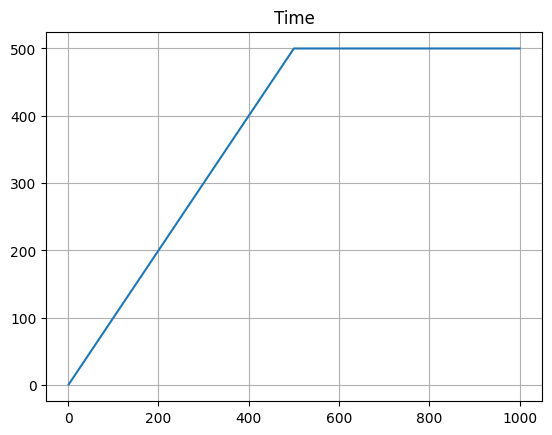

In [37]:
MAX = 1000

x = []
y_time = []

original_arr = []
aux_arr = []
obj = 499

create_node_arr(original_arr, MAX, 0, 0, MAX)

for i in range(MAX):
    aux_arr.append(original_arr[i].value)
    y_time.append(iterative_lineal_search_g(aux_arr, obj))
    x.append(len(aux_arr))

plt.title('Time')
plt.plot(x, y_time)
plt.grid(True)
plt.show()

## **Búsqueda Lineal (Recursiva)**
### **Algoritmo** (Prueba de Búsqueda y Polinomios):

In [36]:
MAX = 20
def recursive_lineal_search(arr, obj, i = 0):
    if i >= len(arr):
        return -1
    if arr[i] == obj:
        return i
    return recursive_lineal_search(arr, obj, i + 1)

arr = []
aux = []

# lista, tamaño, (0 = ascendente, 1 = descendente, 2 = aleatorio, 3 = palabras), lím inferior, lím superior)
create_node_arr(arr, MAX, 0, 0, MAX)

for i in range(MAX):
    aux.append(arr[i].value)
    
obj = 6
print("El valor ", obj, " esta en la posición: ", recursive_lineal_search(aux, obj) + 1)

El valor  6  esta en la posición:  7


### **Algortimo** (Gráfica):

In [39]:
MAX = 20
def recursive_lineal_search_g(arr, obj, time, i = 0):
    time += 1
    if i >= len(arr):
        return time
    if arr[i] == obj:
        return time
    return recursive_lineal_search_g(arr, obj, i + 1, time)

## **Mejor Caso**
### $O(n)$

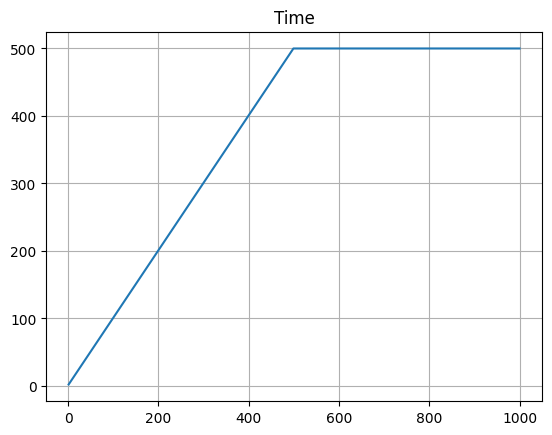

In [41]:
MAX = 1000

x = []
y_time = []

original_arr = []
aux_arr = []
obj = 499

create_node_arr(original_arr, MAX, 0, 0, MAX)

for i in range(MAX):
    aux_arr.append(original_arr[i].value)
    y_time.append(recursive_lineal_search_g(aux_arr, obj, 0))
    x.append(len(aux_arr))

plt.title('Time')
plt.plot(x, y_time)
plt.grid(True)
plt.show()

## **Búsqueda Binaria (Iterativa Ineficiente)**
### Algoritmo de Búsqueda Ineficiente

In [156]:
def bubble_sort(arr, time):
    n = len(arr)
    i = 0
    swap = False
    while i < n - 1:
        j = 0
        time += 1
        while j < n - i - 1:
            time += 1
            if arr[j].value > arr[j + 1].value:
                temp = arr[j]
                arr[j] = arr[j + 1]
                arr[j + 1] = temp
                swap = True
            if not swap: break
            j += 1
        i += 1
    return arr, time

### **Algoritmo** (Prueba de Búsqueda y Polinomios):

In [331]:
MAX = 20
def iterative_binary_search(arr, obj, time):
    L = 0
    R = len(arr) - 1
    while L <= R:
        time += 1
        mid = (L + R) // 2
        if arr[mid].value == obj:
            return arr[mid], time
        elif arr[mid].value < obj:
            L = mid + 1
        else:
            R = mid - 1
    return Node(-1, ""), time

arr = []
# lista, tamaño, (0 = ascendente, 1 = descendente, 2 = aleatorio, 3 = palabras), lím inferior, lím superior)
create_node_arr(arr, MAX, 2, 0, MAX)
for i in range(MAX):
    aux.append(arr[i].value)
arr, time = bubble_sort(arr, 0)
obj = 6
result, time = iterative_binary_search(arr, obj, time)
if result.value > 0: print("El valor", obj, "esta en", result.name)
else: print("El valor buscado no se encuentra en el arreglo")

El valor buscado no se encuentra en el arreglo


## **Mejor Caso**:

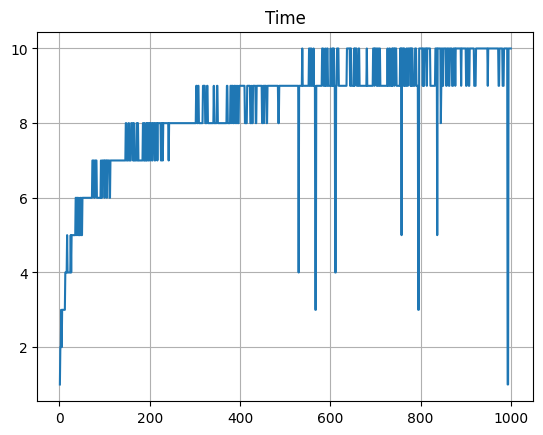

In [355]:
MAX = 1000

x = []
y_time = []

arr = []
aux = []
obj = 500

create_node_arr(arr, MAX, 2, 0, MAX)
arr, time = bubble_sort(arr, 0)


for i in range(MAX):
    aux.append(arr[i])
    result, time = iterative_binary_search(aux, obj, 0)
    y_time.append(time)
    x.append(len(aux))

plt.title('Time')
plt.plot(x, y_time)
plt.grid(True)
plt.show()

## **Mejor Caso**
### $O(n)$

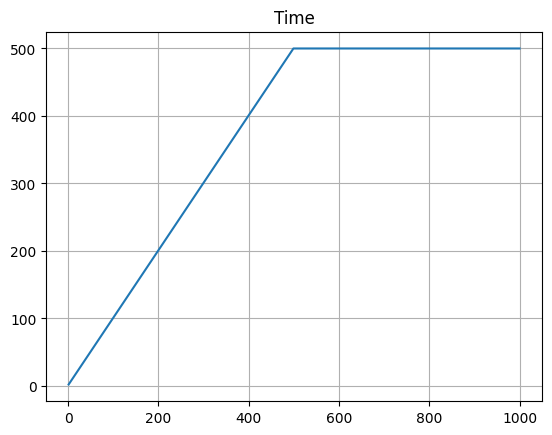

In [ ]:
MAX = 1000

x = []
y_time = []

original_arr = []
aux_arr = []
obj = 499

create_node_arr(original_arr, MAX, 0, 0, MAX)

for i in range(MAX):
    aux_arr.append(original_arr[i].value)
    y_time.append(recursive_lineal_search_g(aux_arr, obj, 0))
    x.append(len(aux_arr))

plt.title('Time')
plt.plot(x, y_time)
plt.grid(True)
plt.show()

## **Búsqueda Binaria (Iterativa Eficiente)**
### Algoritmo de Búsqueda Eficiente

In [43]:
def radix_sort(arr, exp):
    k = max(arr)
    exp = 1
    while k // exp > 0:
        ordened_list = [0] * len(arr)
        position_list = [0] * 10

        i = 0
        while i < len(arr):
            i = arr[i] // exp
            position_list[i % 10] += 1
            i += 1
        
        i = 1
        while i < 10:
            i = arr[i] // exp
            ordened_list[ordened_list[i % 10] - 1] = arr[i]
            position_list[i % 10] -= 1
            i -= 1
        
        i = 0
        while i < len(arr):
            arr[i] = ordened_list[i]
            i += 1
        exp += 1
    return arr